In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [88]:
# Read in file as pandas dataframe
df = pd.read_csv('results.csv')

# Remove first two rows
df = df.iloc[2:]

# Select columns of interest
df = df [['group', 'Q17', 'Q27', 'Q28', 'Q29','Q30', 'Q24_1', 'Q24_2', 'Q24_3', 'Q24_4', 'Q24_5', 'Q24_6', 'Q24_7', 'Q24_8', 'Q24_9', 'Q24_10']]
# df = df [['group', 'Q17', 'Q27', 'Q28', 'Q29','Q30']]

# Remove data with NaN group values
df = df.dropna(subset=['group'], how = 'all')

# Replace NaN values with 'Not sure' for 24 questions
q24_columns = df.filter(like='Q24_').columns
df[q24_columns] = df[q24_columns].fillna('No aswer')

# Rename group values
df['group'] = df['group'].replace('1', 'Original')
df['group'] = df['group'].replace('2', 'Chat-GPT')
df['group'] = df['group'].replace('3', 'Proposed')

df['Q30'] = df['Q30'].replace('1 - Very little effort', '1')
df['Q30'] = df['Q30'].replace('2 - Little effort', '2')
df['Q30'] = df['Q30'].replace('3 - Neutral', '3')
df['Q30'] = df['Q30'].replace('4 - Medium effort', '4')
df['Q30'] = df['Q30'].replace('5 - A lot of effort', '5')

df['Q27'] = df['Q27'].replace('I\'m not sure', 'Not sure')
df['Q28'] = df['Q28'].replace('I\'m not sure', 'Not sure')
df['Q29'] = df['Q29'].replace('I\'m not sure', 'Not sure')

# print(df)

### Groups

In [89]:
print("Number of people in each group:")
print(df['group'].value_counts())
print("Total: ", df['group'].count())

Number of people in each group:
group
Chat-GPT    10
Proposed     7
Original     2
Name: count, dtype: int64
Total:  19


In [91]:
sns.set_context("poster")
sns.set_style("whitegrid")

### Simplicity

In [103]:
counts = df.groupby(["Q17", "group"]).size().reset_index(name="count")

plt.figure(figsize=(18, 6))
sns.barplot(data=counts, x="Q17", y="count", hue="group", palette="Set2", ci=None)

plt.xlabel("Score (1: Very difficult - 5: Very easy)")
plt.ylabel("Count")
plt.title("Simplicity scores per T&C version")
plt.legend(title="T&C version")
plt.tight_layout()
plt.savefig('simplicity_scores.png')
plt.show()

ValueError: Could not interpret value `Q30` for `x`. An entry with this name does not appear in `data`.

<Figure size 1800x600 with 0 Axes>

In [93]:
# Cast to ints
df["Q17"] = df["Q17"].astype(int)

print("Average simplicity scores per group:")
print("Original:", df[df["group"] == "Original"]["Q17"].mean())
print("Chat-GPT:", df[df["group"] == "Chat-GPT"]["Q17"].mean())
print("Proposed:", df[df["group"] == "Proposed"]["Q17"].mean())


Average simplicity scores per group:
Original: 3.5
Chat-GPT: 4.8
Proposed: 3.142857142857143


### Comprehension

In [94]:
# count trues, falses and no answers for each group in 24_ questions
group1 = df[df["group"] == "Original"]
group2 = df[df["group"] == "Chat-GPT"]
group3 = df[df["group"] == "Proposed"]

group1['correct'] = group1[q24_columns].apply(lambda x: x.str.contains('True').sum(), axis=1)
group1['incorrect'] = group1[q24_columns].apply(lambda x: x.str.contains('False').sum(), axis=1)
group1['no_answer'] = group1[q24_columns].apply(lambda x: x.str.contains('No aswer').sum(), axis=1)

group2['correct'] = group2[q24_columns].apply(lambda x: x.str.contains('True').sum(), axis=1)
group2['incorrect'] = group2[q24_columns].apply(lambda x: x.str.contains('False').sum(), axis=1)
group2['no_answer'] = group2[q24_columns].apply(lambda x: x.str.contains('No aswer').sum(), axis=1)

group3['correct'] = group3[q24_columns].apply(lambda x: x.str.contains('True').sum(), axis=1)
group3['incorrect'] = group3[q24_columns].apply(lambda x: x.str.contains('False').sum(), axis=1)
group3['no_answer'] = group3[q24_columns].apply(lambda x: x.str.contains('No aswer').sum(), axis=1)

group1 = group1[['correct', 'incorrect', 'no_answer']]
group2 = group2[['correct', 'incorrect', 'no_answer']]
group3 = group3[['correct', 'incorrect', 'no_answer']]
group1 = group1.sum()
group2 = group2.sum()
group3 = group3.sum()

/var/folders/l7/wzp39ssn7gggk5cszv0vycdc0000gn/T/ipykernel_36880/2305307201.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group1['correct'] = group1[q24_columns].apply(lambda x: x.str.contains('True').sum(), axis=1)
/var/folders/l7/wzp39ssn7gggk5cszv0vycdc0000gn/T/ipykernel_36880/2305307201.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group1['incorrect'] = group1[q24_columns].apply(lambda x: x.str.contains('False').sum(), axis=1)
/var/folders/l7/wzp39ssn7gggk5cszv0vycdc0000gn/T/ipykernel_36880/

In [95]:
# # Actual number of answers per t&c version
# summary_df = pd.DataFrame({
#     "T&C Version": ["Original", "Chat-GPT", "Proposed"],
#     "correct": [group1["correct"], group2["correct"], group3["correct"]],
#     "incorrect": [group1["incorrect"], group2["incorrect"], group3["incorrect"]],
#     "no_answer": [group1["no_answer"], group2["no_answer"], group3["no_answer"]],
# })


# sns.set_palette("Set2")
# colors = sns.color_palette("Set2", 3)
# fig, ax = plt.subplots(figsize=(6, 12))

# x = summary_df["T&C Version"]
# correct = summary_df["correct"]
# incorrect = summary_df["incorrect"]
# no_answer = summary_df["no_answer"]

# ax.bar(x, correct, label="Correct", color=colors[0])
# ax.bar(x, incorrect, bottom=correct, label="Incorrect", color=colors[1])
# ax.bar(x, no_answer, bottom=correct + incorrect, label="No Answer", color=colors[2])

# ax.set_title("Answers on comprehension questions per T&C version")
# # ax.set_title("Correctness of answers per T&C version")
# ax.set_xlabel("T&C Version", fontsize=12)
# ax.set_ylabel("Number of Answers", fontsize=12)
# ax.legend(title="Answer Type")
# plt.xticks(fontsize=10)
# plt.yticks(fontsize=10)
# plt.grid(axis="y", linestyle="--", alpha=0.7)

# plt.tight_layout()
# plt.savefig('comprehension.png')
# plt.show()

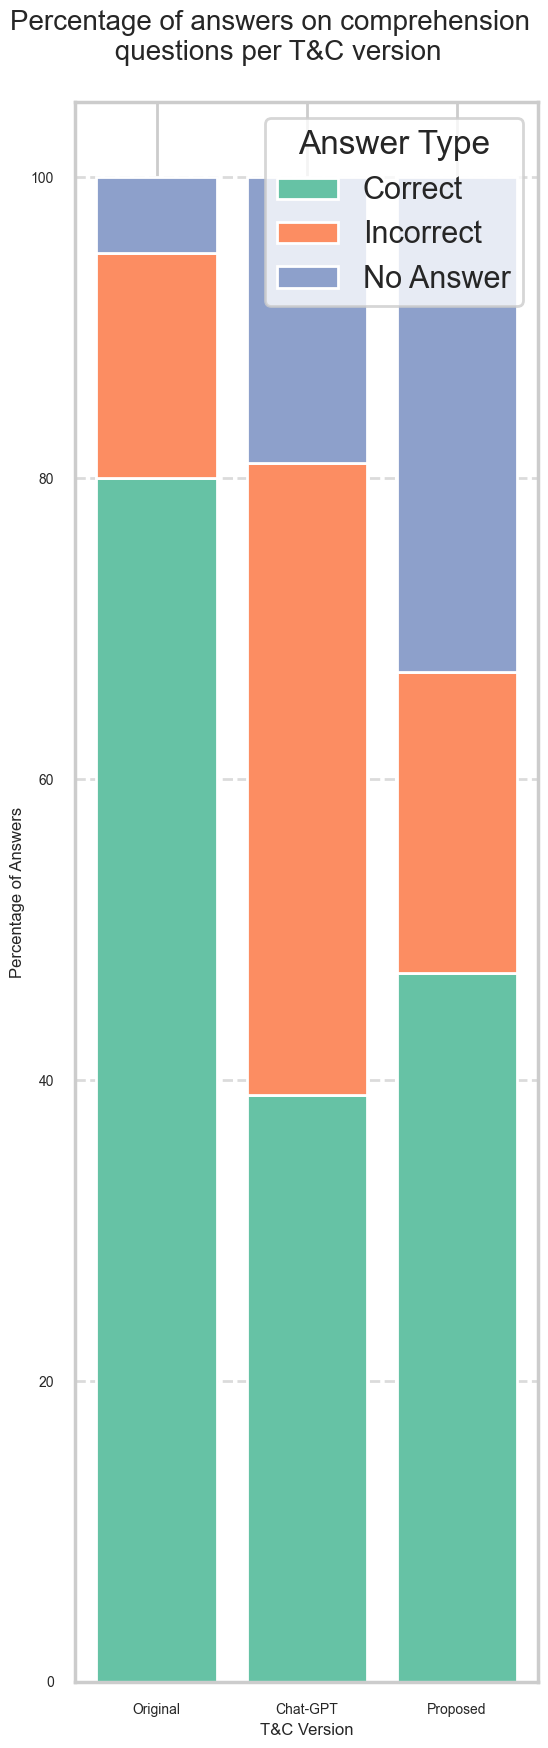

In [96]:
# percentage of each answer type
summary_df = pd.DataFrame({
    "T&C Version": ["Original", "Chat-GPT", "Proposed"],
    "correct": [group1["correct"], group2["correct"], group3["correct"]],
    "incorrect": [group1["incorrect"], group2["incorrect"], group3["incorrect"]],
    "no_answer": [group1["no_answer"], group2["no_answer"], group3["no_answer"]],
})

summary_df["total"] = summary_df[["correct", "incorrect", "no_answer"]].sum(axis=1)
summary_df["correct_percentage"] = (summary_df["correct"] / summary_df["total"]) * 100
summary_df["incorrect_percentage"] = (summary_df["incorrect"] / summary_df["total"]) * 100
summary_df["no_answer_percentage"] = (summary_df["no_answer"] / summary_df["total"]) * 100

x = summary_df["T&C Version"]
correct = summary_df["correct_percentage"]
incorrect = summary_df["incorrect_percentage"]
no_answer = summary_df["no_answer_percentage"]

sns.set_palette("Set2")
colors = sns.color_palette("Set2", 3)
fig, ax = plt.subplots(figsize=(6, 18))

ax.bar(x, correct, label="Correct", color=colors[0])
ax.bar(x, incorrect, bottom=correct, label="Incorrect", color=colors[1])
ax.bar(x, no_answer, bottom=correct + incorrect, label="No Answer", color=colors[2])

ax.set_xlabel("T&C Version", fontsize=12)
ax.set_ylabel("Percentage of Answers", fontsize=12)
ax.legend(title="Answer Type")

fig.suptitle("Percentage of answers on comprehension \n questions per T&C version", fontsize=20)

plt.tight_layout(rect=[0, 0, 1, 0.96])
fig.subplots_adjust(top=0.92, left=0.1, right=0.9)

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.tight_layout()
plt.savefig('comprehension.png')
plt.show()

### Engagement

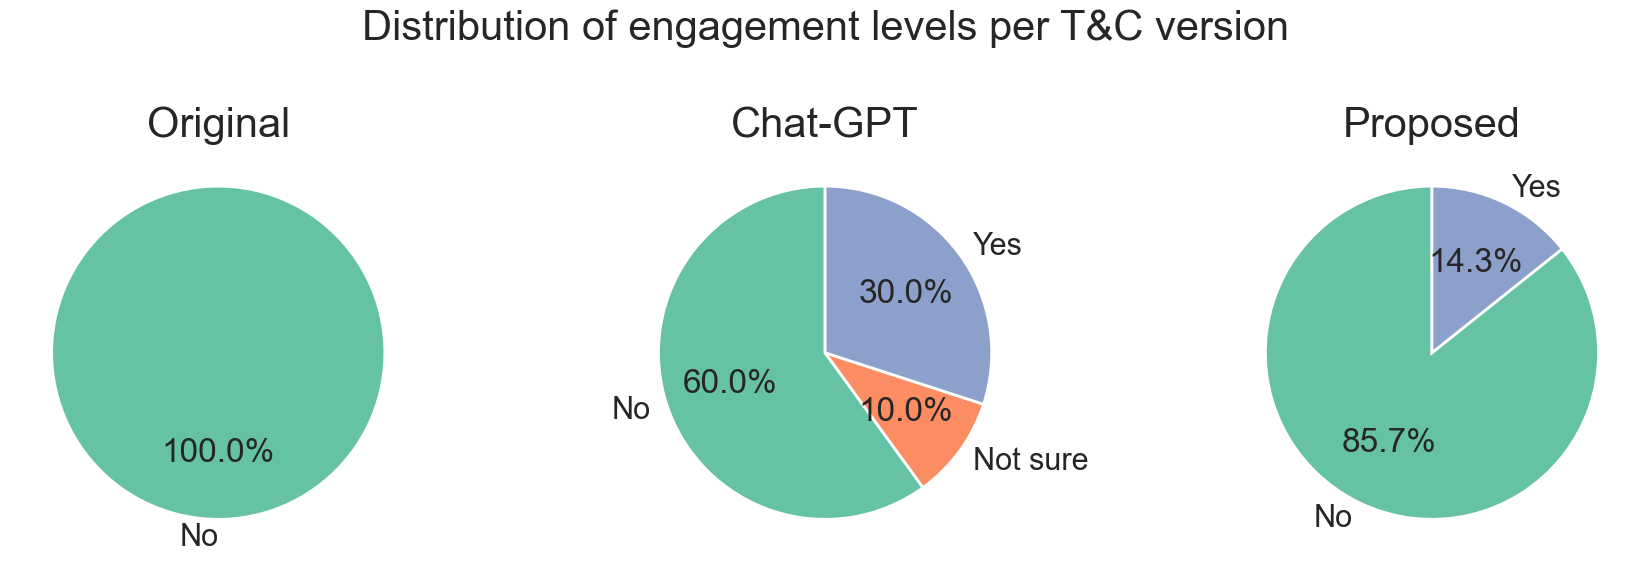

In [102]:
grouped_data = df.groupby(["group", "Q27"]).size().reset_index(name="count")
total_responses = grouped_data.groupby("group")["count"].transform("sum")
grouped_data["proportion"] = grouped_data["count"] / total_responses

all_categories = grouped_data["Q27"].unique()

palette = sns.color_palette("Set2", n_colors=len(all_categories))
category_color_mapping = {category: palette[i] for i, category in enumerate(sorted(all_categories))}
group_order = ['Original', 'Chat-GPT', 'Proposed']
fig, axes = plt.subplots(1, len(group_order), figsize=(18, 6))

for i, group in enumerate(group_order):
    group_data = grouped_data[grouped_data["group"] == group]
    group_data = group_data.sort_values("Q27")
    group_colors = [category_color_mapping[category] for category in sorted(group_data["Q27"].unique())]

    wedges, texts, autotexts = axes[i].pie(group_data["proportion"],
                                           labels=group_data["Q27"],
                                           autopct='%1.1f%%',
                                           colors=group_colors,
                                           startangle=90)

    axes[i].set_title(group, fontsize=30)

fig.suptitle("Distribution of engagement levels per T&C version", fontsize=30)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.savefig("engagement.png")
plt.show()



### Cognitive effort

/usr/local/lib/python3.9/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.9/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.9/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


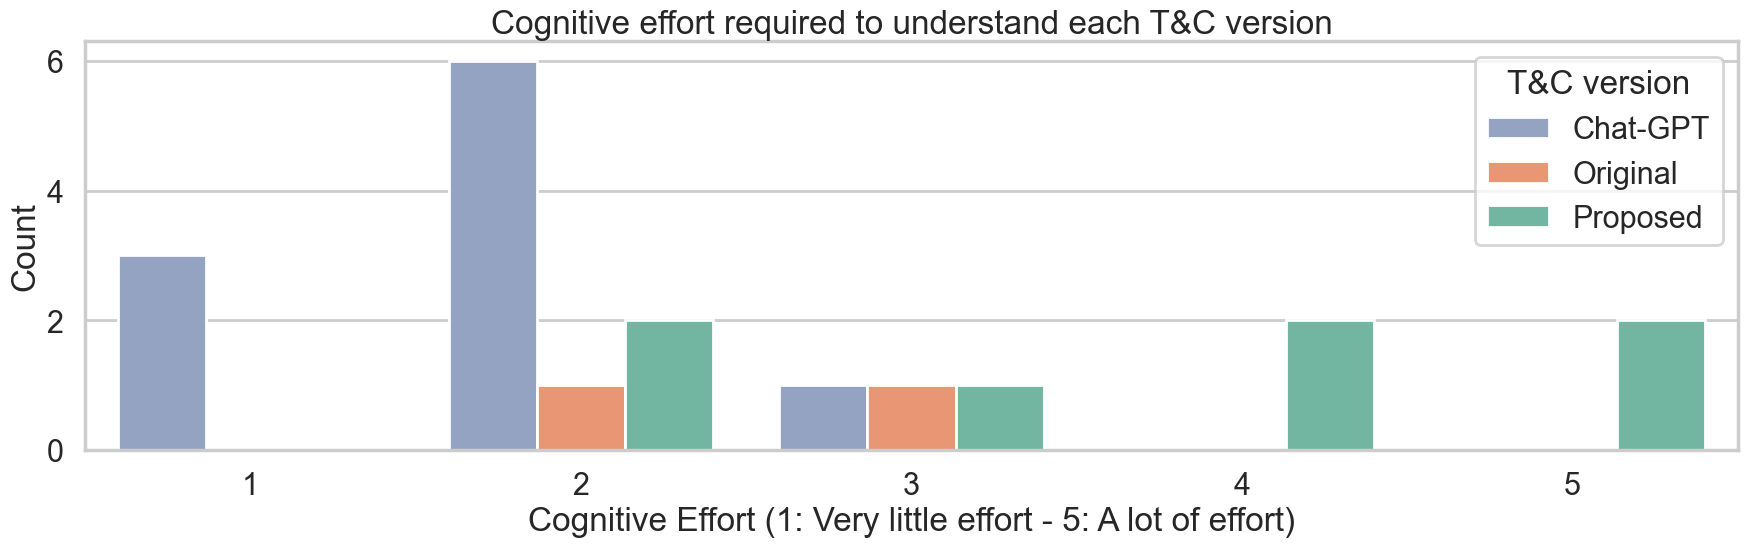

In [105]:
effort_counts = df.groupby(["Q30", "group"]).size().reset_index(name="count")

colors = sns.color_palette("Set2", 3)
palette = {"Original": colors[1], "Proposed": colors[0], "Chat-GPT": colors[2]}

plt.figure(figsize=(18, 6))
sns.barplot(data=effort_counts, x="Q30", y="count", hue="group", palette=palette)

plt.xlabel("Cognitive Effort (1: Very little effort - 5: A lot of effort)")
plt.ylabel("Count")
plt.title("Cognitive effort required to understand each T&C version")
plt.legend(title="T&C version")
plt.tight_layout()
plt.savefig("cognitive_effort.png")
plt.show()
